<a href="https://colab.research.google.com/github/alirezash97/Advanced-AI-Course/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np


In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

torch.Size([4, 1, 28, 28])
torch.Size([4])


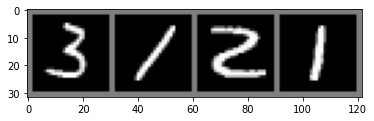

tensor(3)    tensor(1)    tensor(2)    tensor(1)


In [31]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('    '.join('%5s' % labels[j] for j in range(4)))

In [32]:
import torch.nn as nn
import torch.nn.functional as F 

class Network(nn.Module):
  
  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(1, 8, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(8, 16, 6)
    self.fc1 = nn.Linear(16 * 4 * 4, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

Network = Network()


In [33]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(Network.parameters(), lr = 0.001, momentum = 0.9)

In [34]:
for epoch in range(1):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    
    inputs, label = data
    optimizer.zero_grad()
    outputs = Network(inputs)
    loss = loss_function(outputs, label)
    loss.backward()
    optimizer.step()


    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %( epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
    
print('Finished Training Network')


[1,  2000] loss: 1.186
[1,  4000] loss: 0.243
[1,  6000] loss: 0.143
[1,  8000] loss: 0.114
[1, 10000] loss: 0.101
[1, 12000] loss: 0.095
[1, 14000] loss: 0.089
Finished Training Network


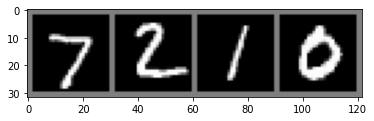

GroundTruth:  tensor(7) tensor(2) tensor(1) tensor(0)
Predicted:  tensor([-2.1258,  0.6236,  1.5395,  2.0073, -4.1080, -0.9180, -8.3257, 12.7417,
        -0.5583,  0.2748], grad_fn=<SelectBackward>) tensor([ 3.1825,  3.8831, 14.2873, -1.0388, -6.2867, -4.0188, -0.4545, -2.7722,
         1.2399, -8.0234], grad_fn=<SelectBackward>) tensor([-5.0541,  9.8248,  0.2235, -3.7644,  1.5450, -0.4524, -0.8048,  1.1799,
         0.2513, -2.6629], grad_fn=<SelectBackward>) tensor([10.9985, -2.9948,  1.4810, -3.5043, -2.8935, -0.1886,  1.8911, -1.3803,
        -1.6388, -1.1289], grad_fn=<SelectBackward>)


In [35]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(4)))
outputs = Network(images)
print('Predicted: ', ' '.join('%5s' % outputs[j] for j in range(4)))

In [61]:
from sklearn.metrics import precision_score, recall_score

correct = 0
# precision = []
# recall = []
final_predicted = []
final_labels = []
total = 0
with torch.no_grad():
    i = 0
    for data in testloader:
        i += 1
        images, labels = data
        outputs = Network(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        final_predicted = np.concatenate((final_predicted, np.array(predicted)))
        final_labels= np.concatenate((final_labels, np.array(labels)))

precision = precision_score(final_labels, final_predicted, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], average='micro')
recall = recall_score(final_labels, final_predicted, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], average='micro')

print('Accuracy of the network on the %d test images: %d %%' % (i*4, 100 * correct / total))

print('Precision of the network on the %d test images: %f %%' % (i*4, precision))

print('Recall of the network on the %d test images: %f %%' % (i*4, recall))

Accuracy of the network on the 10000 test images: 97 %
Precision of the network on the 10000 test images: 0.977800 %
Recall of the network on the 10000 test images: 0.977800 %
